### Import library

In [1]:
import pandas as pd
import numpy as np
import csv
import collections
from scipy.stats import zscore
from datetime import datetime
#import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

import tensorflow as tf
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.optimizers import Adam
from keras.layers import Conv1D, Conv2D, MaxPooling2D

Using TensorFlow backend.


### Data Preparation
Data have been imported from **yfinance** and downloaded from [alphavantage](https://www.alphavantage.co/documentation/)

Teknikal indikator dari **yfinance**

In [2]:
# import data
#tekin = yf.download("MSFT", start="2000-07-20", end="2020-04-24") # harga saham apel
#tekin_close = tekin['Close']
#print(tekin.shape,'\n')
#print(tekin.head())

In [3]:
# import data
data_tekin = pd.read_csv("../input/input-data/MSFT dataset_fix.csv")
#data = pd.read_csv("../input/inputdata/aapl_pricetech.csv")
data_tekin = data_tekin.drop(["Chaikin A/D"], axis=1)
print(data_tekin.head())
print(data_tekin.tail())

         Date  Real Middle Band  Real Upper Band  Real Lower Band  Aroon Up  \
0  2000-06-19           67.0580          74.3798          59.7362       100   
1  2000-06-20           67.5955          75.5474          59.6436       100   
2  2000-06-21           68.4705          77.9880          58.9530       100   
3  2000-06-22           69.1860          79.8081          58.5639        95   
4  2000-06-23           69.9955          80.6189          59.3721        90   

   Aroon Down  MACD_Hist    MACD  MACD_Signal    SlowK    SlowD      ADX  \
0          25     1.0213  1.0200      -0.0013  95.1896  82.5549  16.2698   
1          20     1.0811  1.3500       0.2690  95.0161  92.3052  17.3044   
2          15     1.4263  2.0519       0.6256  93.3612  94.5223  19.0282   
3          10     1.5100  2.5130       1.0031  86.6472  91.6748  20.6658   
4           5     1.3349  2.6717       1.3368  73.7240  84.5775  21.6161   

      Close  
0  36.84375  
1  37.46875  
2  40.34375  
3  39.93750 

In [4]:
#import url (APO, PPO, BOP, OBV, HT_PHASOR, HT_DCPERIOD)
url_APO = "https://www.alphavantage.co/query?function=APO&symbol=MSFT&interval=daily&time_period=60&outputsize=full&series_type=close&datatype=csv&apikey=JD0GVEZD8SYF5ERZ"
url_PPO = "https://www.alphavantage.co/query?function=PPO&symbol=MSFT&interval=daily&time_period=60&outputsize=full&series_type=close&datatype=csv&apikey=JD0GVEZD8SYF5ERZ"
url_BOP = "https://www.alphavantage.co/query?function=BOP&symbol=MSFT&interval=daily&time_period=60&outputsize=full&series_type=close&datatype=csv&apikey=JD0GVEZD8SYF5ERZ"
#url_HT_PHASOR = "https://www.alphavantage.co/query?function=HT_PHASOR&symbol=MSFT&interval=daily&time_period=60&outputsize=full&series_type=close&datatype=csv&apikey=JD0GVEZD8SYF5ERZ"
#url_HT_PHASOR = "https://www.alphavantage.co/query?function=HT_DCPERIOD&symbol=MSFT&interval=daily&time_period=60&outputsize=full&series_type=close&datatype=csv&apikey=JD0GVEZD8SYF5ERZ"
tekin_apo = pd.read_csv(url_APO)
tekin_ppo = pd.read_csv(url_PPO)
tekin_bop = pd.read_csv(url_BOP)
print(tekin_apo.head(),'\n')
print(tekin_apo.tail(),'\n')
print(tekin_apo.shape)

         time     APO
0  2020-07-10  7.2522
1  2020-07-09  7.3611
2  2020-07-08  7.3464
3  2020-07-07  7.0269
4  2020-07-06  6.9943 

            time     APO
5003  2000-08-18 -0.2553
5004  2000-08-17 -0.7350
5005  2000-08-16 -1.3107
5006  2000-08-15 -1.7222
5007  2000-08-14 -2.1838 

(5008, 2)


In [5]:
# membalik urutan tanggal
tekin_apo = tekin_apo.iloc[::-1]
tekin_ppo = tekin_ppo.iloc[::-1]
tekin_bop = tekin_bop.iloc[::-1]

print(tekin_apo.head())
print(tekin_apo.tail())

            time     APO
5007  2000-08-14 -2.1838
5006  2000-08-15 -1.7222
5005  2000-08-16 -1.3107
5004  2000-08-17 -0.7350
5003  2000-08-18 -0.2553
         time     APO
4  2020-07-06  6.9943
3  2020-07-07  7.0269
2  2020-07-08  7.3464
1  2020-07-09  7.3611
0  2020-07-10  7.2522


In [6]:
print(tekin_apo.head())
print(tekin_apo.tail())

            time     APO
5007  2000-08-14 -2.1838
5006  2000-08-15 -1.7222
5005  2000-08-16 -1.3107
5004  2000-08-17 -0.7350
5003  2000-08-18 -0.2553
         time     APO
4  2020-07-06  6.9943
3  2020-07-07  7.0269
2  2020-07-08  7.3464
1  2020-07-09  7.3611
0  2020-07-10  7.2522


In [7]:
# Combining data from two dataframes
data = pd.merge(left=data_tekin, left_on='Date',
                right=tekin_apo, right_on='time')
data = data.drop(['time'], axis=1)

data = pd.merge(left=data, left_on='Date',
               right=tekin_ppo, right_on='time')
data = data.drop(['time'], axis=1)

data = pd.merge(left=data, left_on='Date',
               right=tekin_bop, right_on='time')
data = data.drop(['time'], axis=1)

In [8]:
data.shape

(4954, 16)

Let's see the relationship of each features. For doing that,we can use packages from [Seaborn](https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/)

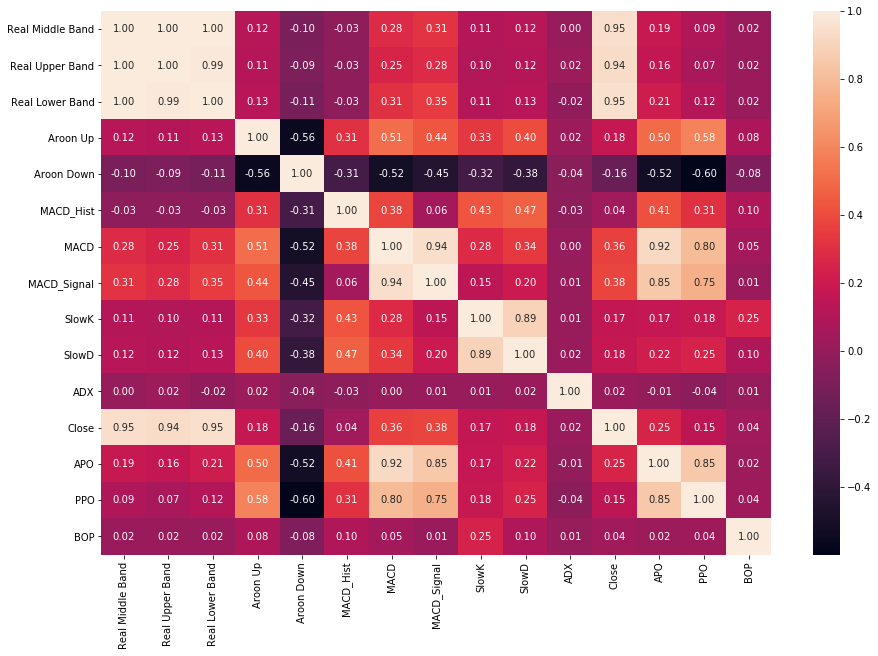

In [9]:
# Find relationship of each features
import seaborn as sns
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")

In [10]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

data.describe()

,Real Middle Band,Real Upper Band,Real Lower Band,Aroon Up,Aroon Down,MACD_Hist,MACD,MACD_Signal,SlowK,SlowD,ADX,Close,APO,PPO,BOP
count,4954.00,4954.00,4954.00,4954.00,4954.00,4954.00,4954.00,4954.00,4954.00,4954.00,4954.00,4954.00,4954.00,4954.00,4954.00
mean,47.73,50.29,45.17,54.78,43.60,0.00,0.12,0.12,52.73,52.74,20.45,44.19,0.13,0.12,0.02
std,31.50,33.29,29.88,36.10,36.03,0.37,1.13,1.04,25.42,23.52,8.10,32.13,1.67,3.00,0.52
min,16.45,17.78,9.43,0.00,0.00,-3.48,-8.91,-7.21,1.12,3.29,6.49,15.15,-14.21,-34.73,-0.99
25%,26.89,27.95,25.59,20.00,10.00,-0.12,-0.28,-0.27,31.00,33.17,14.25,26.47,-0.41,-1.11,-0.42
50%,31.84,33.46,30.18,60.00,35.00,0.00,0.13,0.12,53.91,53.74,19.48,29.57,0.16,0.43,0.00
75%,57.44,61.63,53.42,90.00,80.00,0.12,0.53,0.50,75.34,73.17,24.87,46.68,0.64,1.61,0.47
max,179.33,196.19,165.54,100.00,100.00,2.91,6.81,6.22,99.31,98.12,52.21,188.70,11.51,12.26,1.00


In [11]:
# convert to datetime
data['Date'] = pd.to_datetime(data['Date'])
# set the index
data.set_index('Date', inplace=True)

In [12]:
data.shape

(4954, 15)

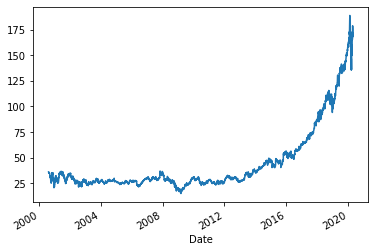

In [13]:
# Plot target data
y_close = data.Close
y_close.plot()

In [14]:
data.head()

,Real Middle Band,Real Upper Band,Real Lower Band,Aroon Up,Aroon Down,MACD_Hist,MACD,MACD_Signal,SlowK,SlowD,ADX,Close,APO,PPO,BOP
Date,,,,,,,,,,,,,,,
2000-08-14,71.40,76.57,66.24,0,35,0.36,-0.65,-1.01,54.61,69.11,17.41,36.09,-2.18,-2.98,-0.06
2000-08-15,71.06,75.08,67.04,0,30,0.31,-0.62,-0.93,34.88,53.13,16.57,35.81,-1.72,-2.36,-0.25
2000-08-16,70.95,74.86,67.05,0,25,0.22,-0.65,-0.87,21.56,37.02,15.95,35.50,-1.31,-1.80,-0.51
2000-08-17,70.79,74.29,67.29,0,20,0.21,-0.62,-0.82,18.43,24.96,15.36,35.78,-0.73,-1.02,0.31
2000-08-18,70.72,74.15,67.29,0,15,0.15,-0.63,-0.78,25.94,21.98,14.95,35.50,-0.26,-0.35,-0.08


In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

pd.DataFrame(data_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.34,0.33,0.36,0.00,0.35,0.60,0.53,0.46,0.54,0.69,0.24,0.12,0.47,0.68,0.47
1,0.34,0.32,0.37,0.00,0.30,0.59,0.53,0.47,0.34,0.53,0.22,0.12,0.49,0.69,0.37
2,0.33,0.32,0.37,0.00,0.25,0.58,0.53,0.47,0.21,0.36,0.21,0.12,0.50,0.70,0.24
3,0.33,0.32,0.37,0.00,0.20,0.58,0.53,0.48,0.18,0.23,0.19,0.12,0.52,0.72,0.65
4,0.33,0.32,0.37,0.00,0.15,0.57,0.53,0.48,0.25,0.20,0.18,0.12,0.54,0.73,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,0.87,0.92,0.81,1.00,0.10,1.00,0.87,0.68,0.92,0.91,0.34,0.94,0.95,0.88,0.39
4950,0.89,0.93,0.83,0.95,0.05,0.94,0.89,0.72,0.83,0.91,0.35,0.92,0.97,0.88,0.29
4951,0.90,0.92,0.86,0.90,0.00,0.81,0.86,0.76,0.54,0.77,0.35,0.88,0.99,0.89,0.12
4952,0.90,0.92,0.87,0.85,0.00,0.76,0.86,0.78,0.41,0.59,0.34,0.91,1.00,0.89,0.83


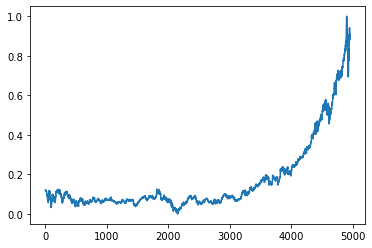

In [16]:
# cek grafik
y_close_scaled = data_scaled[:,11]
plt.plot(y_close_scaled)
plt.show()

Now we will split the data into two parts, training set (90%) and testing set (10%).

In [17]:
# Splitting data
n_train = round(len(data_scaled)*0.9) # % for training

train = data_scaled[:n_train,:data.shape[1]]
test = data_scaled[n_train:,:data.shape[1]]

y_close_train = y_close_scaled[:n_train,]
y_close_test = y_close_scaled[n_train:,]

# Cek shape
print('Ukuran data asli: ', data_scaled.shape)
print('x_train: ', train.shape)
print('x_test: ', test.shape)
print('y_train: ', y_close_train.shape)
print('y_test: ', y_close_test.shape)

Ukuran data asli:  (4954, 15)
x_train:  (4459, 15)
x_test:  (495, 15)
y_train:  (4459,)
y_test:  (495,)


Next, we will covert time series data (1D) into 2D array.

In [18]:
# Converting time series data into 2D array
import numpy as np

def to_sequences(seq_size, data,close):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        window = data[i:(i+seq_size)]
        after_window = close[i+seq_size]
        window = [[x] for x in window]
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)


timesteps = 10

x_train, y_train = to_sequences(timesteps, train, y_close_train)
x_test, y_test   = to_sequences(timesteps, test, y_close_test)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (4448, 10, 1, 15)
Shape of x_test: (484, 10, 1, 15)
Shape of y_train: (4448,)
Shape of y_test: (484,)


In [19]:
# reshape data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[2], x_train.shape[1],x_train.shape[3]))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[2],x_test.shape[1],x_test.shape[3]))

print(x_train.shape)

(4448, 1, 10, 15)


In [20]:
data.shape[1]

15

### CNN Model

In [21]:
cnn = Sequential()
cnn.add(Conv2D(5, kernel_size = (1, 4), strides = (1, 1),  padding = 'same', # sebelumnya padding = 'valid'
               activation = 'relu', input_shape = (1,10,15)))

cnn.add(MaxPooling2D(pool_size = (1,5)))

cnn.add(Flatten())

cnn.add(Dropout(0.1))

cnn.add(Dense(30, activation="relu"))

cnn.summary()   
cnn.add(Dense(1, activation="relu"))
cnn.summary()

cnn.compile(loss='mean_squared_error', optimizer='nadam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1, patience=2, verbose=2, mode='auto') 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 10, 5)          305       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 2, 5)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
Total params: 635
Trainable params: 635
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Outpu

In [22]:
tic = datetime.now()

cnn.fit(x_train,y_train,validation_split=0.1,verbose=2,epochs = 300)

toc = datetime.now()

print("Time riquired: ", toc-tic)

Train on 4003 samples, validate on 445 samples
Epoch 1/300
 - 1s - loss: 0.0022 - val_loss: 0.0280
Epoch 2/300
 - 0s - loss: 0.0011 - val_loss: 0.0062
Epoch 3/300
 - 0s - loss: 7.5873e-04 - val_loss: 0.0029
Epoch 4/300
 - 0s - loss: 4.2534e-04 - val_loss: 4.0316e-04
Epoch 5/300
 - 0s - loss: 2.7517e-04 - val_loss: 0.0013
Epoch 6/300
 - 0s - loss: 2.0170e-04 - val_loss: 6.7716e-04
Epoch 7/300
 - 0s - loss: 1.3140e-04 - val_loss: 0.0025
Epoch 8/300
 - 0s - loss: 1.1542e-04 - val_loss: 7.5612e-05
Epoch 9/300
 - 0s - loss: 1.1753e-04 - val_loss: 0.0010
Epoch 10/300
 - 0s - loss: 8.3980e-05 - val_loss: 8.4330e-04
Epoch 11/300
 - 0s - loss: 1.1155e-04 - val_loss: 8.3247e-04
Epoch 12/300
 - 0s - loss: 7.1419e-05 - val_loss: 0.0061
Epoch 13/300
 - 0s - loss: 7.9634e-05 - val_loss: 0.0012
Epoch 14/300
 - 0s - loss: 7.4047e-05 - val_loss: 4.5802e-04
Epoch 15/300
 - 0s - loss: 7.1063e-05 - val_loss: 0.0013
Epoch 16/300
 - 0s - loss: 5.5756e-05 - val_loss: 5.8234e-04
Epoch 17/300
 - 0s - loss: 4.9

Epoch 140/300
 - 0s - loss: 2.5413e-05 - val_loss: 0.0023
Epoch 141/300
 - 0s - loss: 2.4305e-05 - val_loss: 0.0018
Epoch 142/300
 - 0s - loss: 2.4462e-05 - val_loss: 9.4045e-04
Epoch 143/300
 - 0s - loss: 2.5924e-05 - val_loss: 0.0013
Epoch 144/300
 - 0s - loss: 2.4096e-05 - val_loss: 0.0011
Epoch 145/300
 - 0s - loss: 2.6183e-05 - val_loss: 0.0016
Epoch 146/300
 - 0s - loss: 2.5383e-05 - val_loss: 0.0016
Epoch 147/300
 - 0s - loss: 2.3512e-05 - val_loss: 0.0010
Epoch 148/300
 - 0s - loss: 2.5432e-05 - val_loss: 8.9214e-04
Epoch 149/300
 - 0s - loss: 2.6731e-05 - val_loss: 0.0016
Epoch 150/300
 - 0s - loss: 2.4917e-05 - val_loss: 5.6837e-04
Epoch 151/300
 - 0s - loss: 2.5555e-05 - val_loss: 0.0026
Epoch 152/300
 - 0s - loss: 2.5569e-05 - val_loss: 7.5569e-04
Epoch 153/300
 - 0s - loss: 2.4576e-05 - val_loss: 0.0011
Epoch 154/300
 - 0s - loss: 2.2598e-05 - val_loss: 9.9189e-04
Epoch 155/300
 - 0s - loss: 2.3624e-05 - val_loss: 0.0017
Epoch 156/300
 - 0s - loss: 2.4457e-05 - val_loss: 0

Epoch 278/300
 - 0s - loss: 2.5001e-05 - val_loss: 6.3036e-04
Epoch 279/300
 - 0s - loss: 2.3553e-05 - val_loss: 9.4120e-04
Epoch 280/300
 - 0s - loss: 2.1772e-05 - val_loss: 0.0012
Epoch 281/300
 - 0s - loss: 2.2718e-05 - val_loss: 0.0025
Epoch 282/300
 - 0s - loss: 2.4045e-05 - val_loss: 0.0014
Epoch 283/300
 - 0s - loss: 2.2972e-05 - val_loss: 0.0011
Epoch 284/300
 - 0s - loss: 2.3429e-05 - val_loss: 0.0016
Epoch 285/300
 - 0s - loss: 2.3555e-05 - val_loss: 0.0013
Epoch 286/300
 - 0s - loss: 2.3355e-05 - val_loss: 5.2470e-04
Epoch 287/300
 - 0s - loss: 2.3495e-05 - val_loss: 8.6103e-04
Epoch 288/300
 - 0s - loss: 2.2844e-05 - val_loss: 6.7858e-04
Epoch 289/300
 - 0s - loss: 2.3844e-05 - val_loss: 0.0015
Epoch 290/300
 - 0s - loss: 2.3425e-05 - val_loss: 9.5631e-04
Epoch 291/300
 - 0s - loss: 2.2974e-05 - val_loss: 0.0011
Epoch 292/300
 - 0s - loss: 2.2456e-05 - val_loss: 0.0012
Epoch 293/300
 - 0s - loss: 2.2843e-05 - val_loss: 0.0013
Epoch 294/300
 - 0s - loss: 2.2200e-05 - val_los

In [23]:
pred = cnn.predict(x_test)
pred_tr = cnn.predict(x_train)
print("Shape: {}".format(pred.shape))
print(pred[100])

Shape: (484, 1)
[0.50543773]


In [34]:
np.array([y_test]).T.shape

(484, 1)

In [24]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.06092430753671625


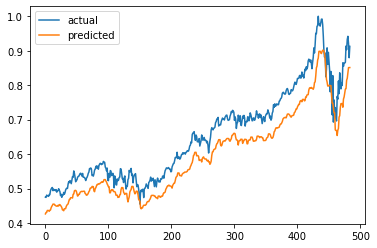

In [25]:
plt.plot(y_test, label = 'actual')
plt.plot(pred,   label = 'predicted')
plt.legend()
plt.show()

Final score (RMSE): 0.009974573261176562